In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection, LineCollection

In [20]:
xystep = 50 * 1e-9
NA = 1.45
sf = 3


# params
ti0 = 0.000190  # working distance
ni0 = 1.518
ni = 1.518
tg0 = 0.000170
tg = 0.000170
ng0 = 1.515
ng = 1.515
ns = 1.33
lamda = 550 * 1e-9


# precompute some stuff
k0 = 2 * np.pi / lamda  # angular wave number
ni0_2 = ni0**2
ni_2 = ni**2
ng0_2 = ng0**2
ng_2 = ng**2
ns_2 = ns**2
NA_2 = NA**2


nx = 31
zp, yp, xp = (0, 0, 0)

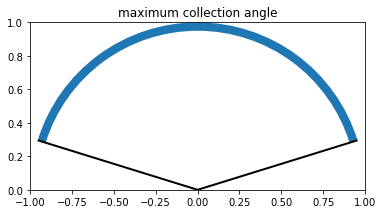

In [21]:
alpha = np.arcsin(NA / ni)  # the half angle of collection

fig, ax = plt.subplots()
patches = [Wedge((0,0), 1, 90 - np.rad2deg(alpha), 90 + np.rad2deg(alpha), width=0.05)]
lines = [[(0, 0), (np.sin(alpha), np.cos(alpha))],[(0, 0), (-np.sin(alpha), np.cos(alpha))]]
ax.add_collection(PatchCollection(patches))
ax.add_collection(LineCollection(lines, colors='k', linewidths=2))
ax.set_xlim([-1, 1])
ax.set_ylim([0, 1])
ax.set_aspect('equal')
ax.set_title('maximum collection angle')
plt.show()

In [26]:
# xymax = maximum xy pixels to calculate
xymax = (nx * sf - 1) // 2
xp *= sf / xystep
yp *= sf / xystep
# add some more in case the particle is offcentered
rn = 1 + int(np.hypot(xp, yp))
# rmax = the maximum radius we need to calculate
# +1 for interpolation, dx, dy
rmax = int(np.ceil(np.sqrt(2.0) * xymax) + rn + 1)
# rvec are the radii in spatial units (m) at which we will calculate the integral
rvec = cp.arange(rmax) * xystep / sf
constJ = k0 * rvec * ni  # mnumber of wavelengths from center?
ci = zp * (1.0 - ni / ns) + ni * (tg0 / ng0 + ti0 / ni0 - tg / ng)

In [27]:
print(f"xymax: {xymax} pixels")
print(f"rmax: {rmax} pixles")

xymax: 46 pixels
rmax: 68 pixles
